In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
def extraer_datos(nombre):
    datos = pd.read_table('Raman/'+nombre,sep=' ')
    

In [82]:
filenames = glob.glob('Raman/*.txt')
# nombre = 'mos2  _532_1200_100x_0_75 nir_50_100_100%_1.txt'
# datos = pd.read_table(filenames[0],sep='\t',header=None)
# plt.plot(datos[0],datos[1])

filenames.pop(8)
filenames.pop(0)
filenames.pop(6)
filenames.pop(4)
filenames

['Raman\\mos2  _532_1200_100x_0_75 nir_50_100_100%_1.txt',
 'Raman\\mos2  _532_1200_100x_0_75 nir_50_100_100%_2.txt',
 'Raman\\mos2  _532_1200_100x_0_75 nir_50_100_25%.txt',
 'Raman\\mos2  _532_1200_100x_0_75 nir_50_100_25%_1.txt',
 'Raman\\mos2  _532_1200_50x_0_80 nir_50_100_25%.txt',
 'Raman\\mos2 -exf _532_1200_100x_0_75 nir_50_100_25%_5.txt',
 'Raman\\mos2 -exf _532_1200_100x_0_75 nir_50_100_25%_6.txt',
 'Raman\\mos2 -exf _532_1200_100x_0_75 nir_50_100_25%_8.txt',
 'Raman\\mos2 -exf _532_1200_100x_0_75 nir_50_100_25%_9.txt']

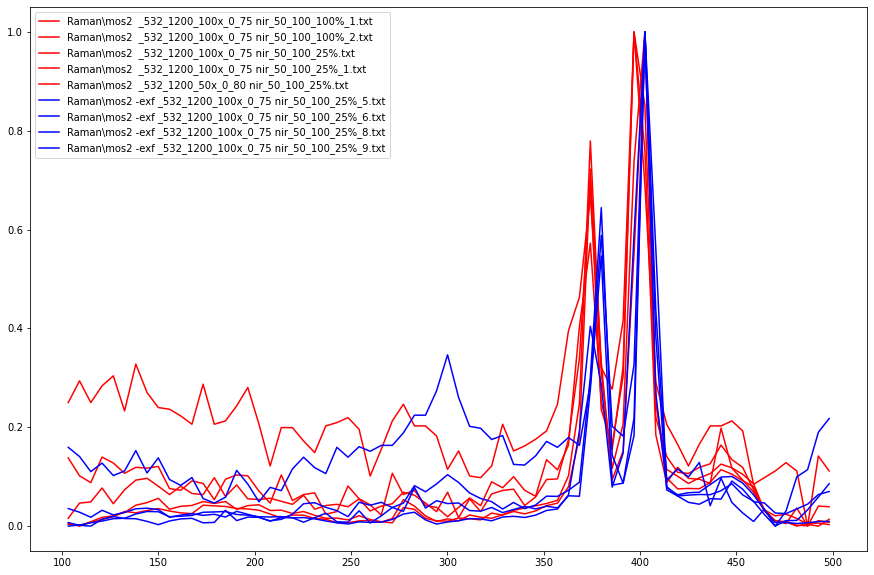

In [83]:
plt.figure(figsize=(15,10))
# plt.xlim(300,450)
# plt.xlim(100,300)

def normalize(datos):
    return (datos-np.amin(datos))/(np.amax(datos)-np.amin(datos))

for (i,name) in enumerate(filenames):
    color = 'red' if i<5 else 'blue'
    datos = pd.read_table(name,sep='\t',header=None)
    y = normalize(datos[1])
#     y = datos[1]
    plt.plot(datos[0],y,color=color,label=name)
plt.legend()

(300.0, 450.0)

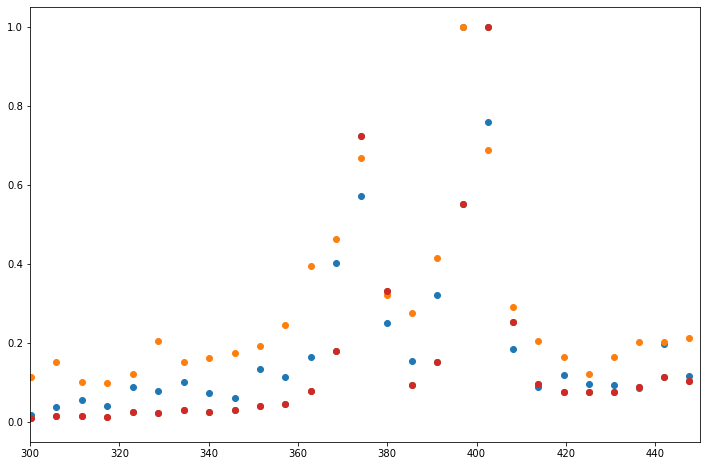

In [5]:

plt.figure(figsize=(12,8))
datos = pd.read_table(filenames[0],sep='\t',header=None)

y = normalize(datos[1])
x = datos[0]
plt.scatter(x,y)
datos = pd.read_table(filenames[1],sep='\t',header=None)
y = normalize(datos[1])
x = datos[0]
plt.scatter(x,y)
datos = pd.read_table(filenames[2],sep='\t',header=None)
y = normalize(datos[1])
x = datos[0]
plt.scatter(x,y)

plt.scatter(x,y)
plt.xlim(300,450)

(26.59599613035971, 25.51783678445088, 0.26004092590746725, 0.5927657480325164)

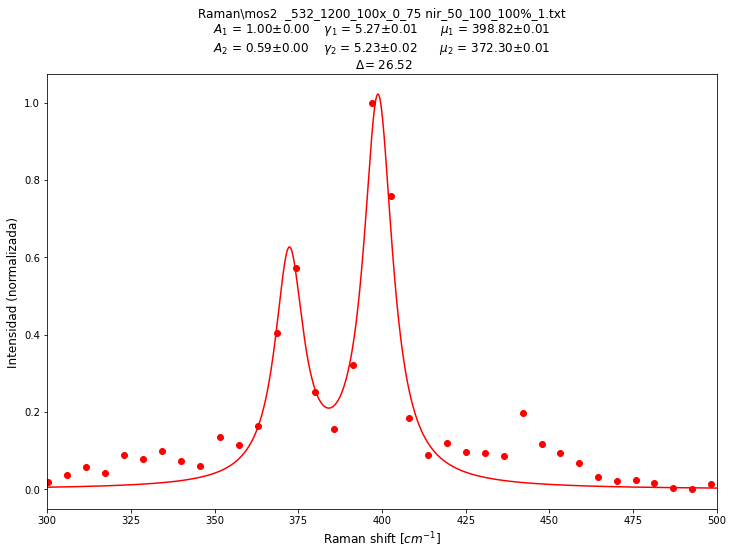

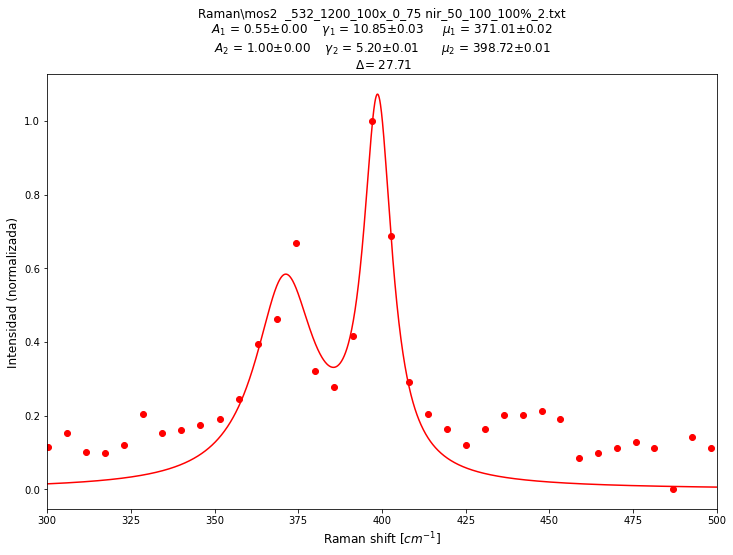

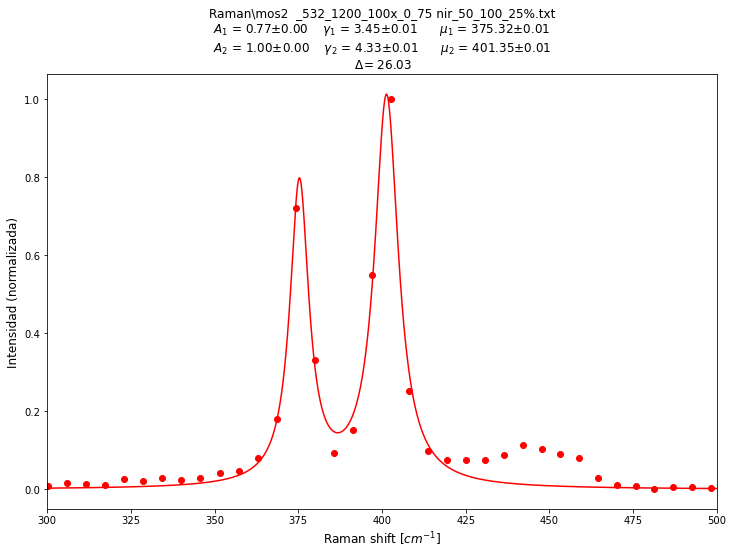

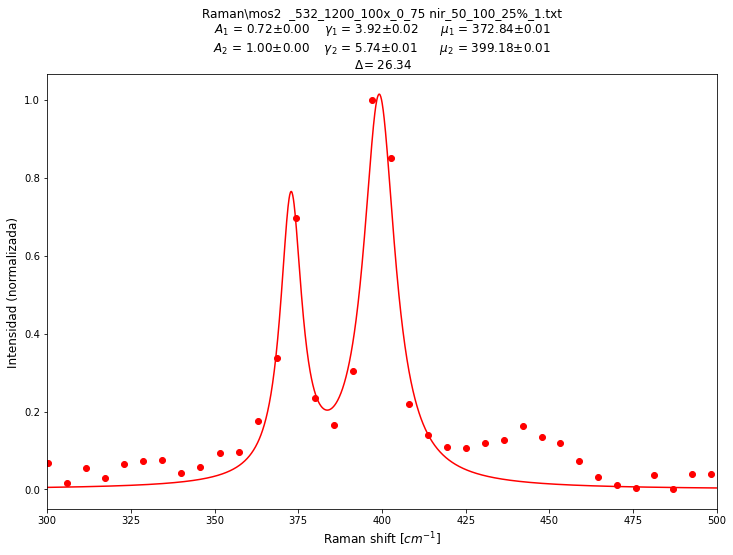

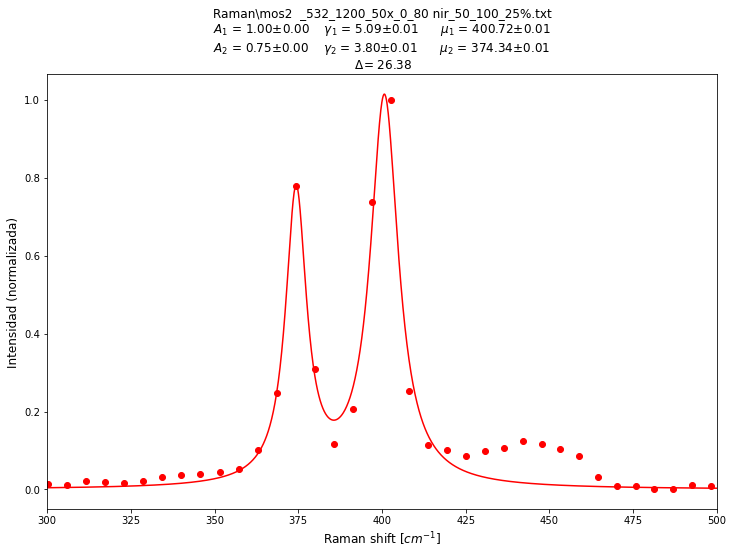

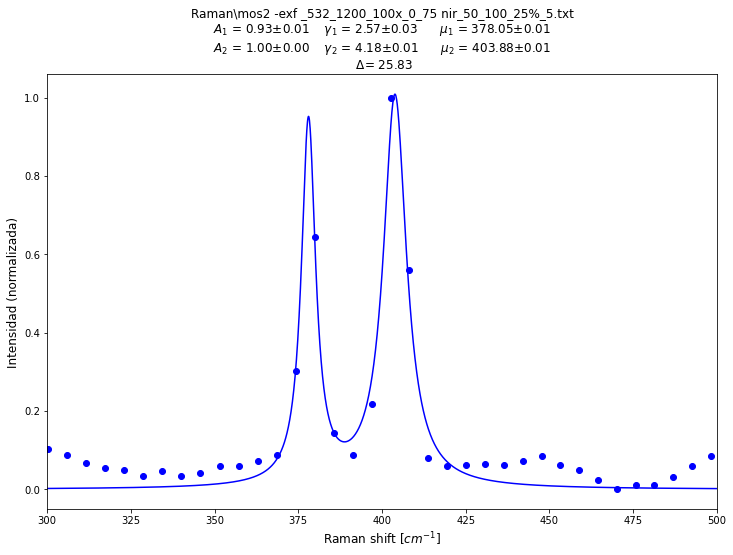

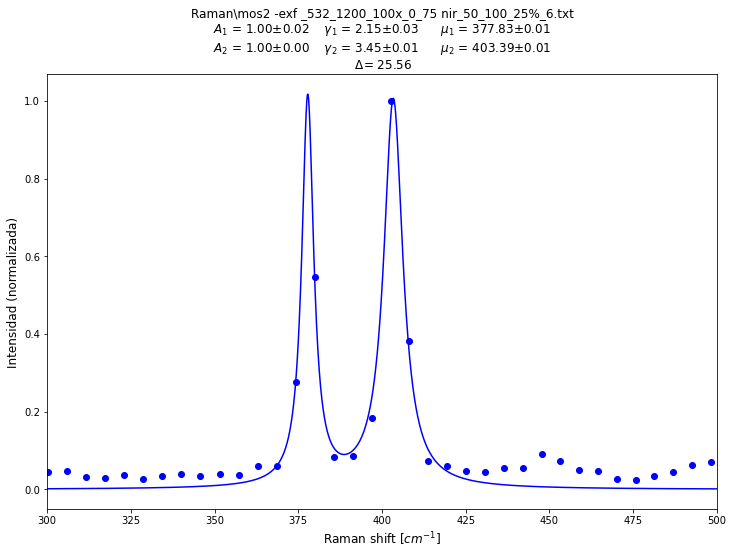

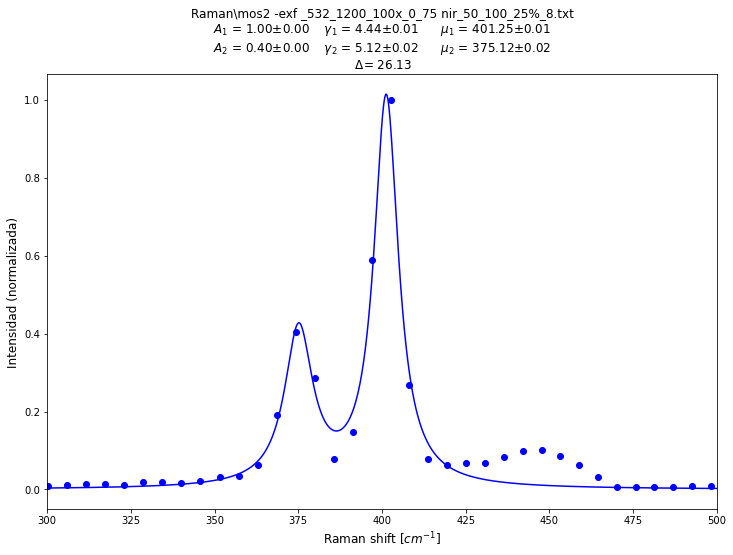

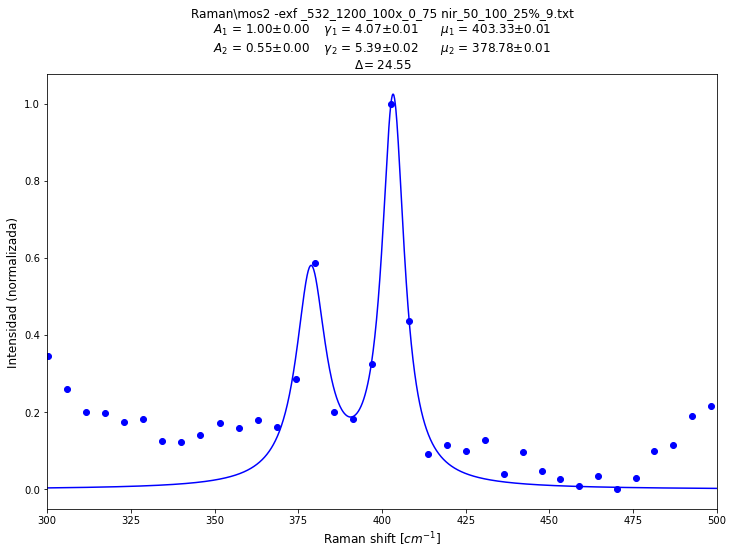

In [48]:
from scipy.stats import linregress
from scipy.optimize import curve_fit

def doble_lorentz(x,A1,gamma1,mu1,A2,gamma2,mu2):
    y1 = gamma1**2 / ( (x-mu1)**2 + gamma1**2)
    y2 = gamma2**2 / ( (x-mu2)**2 + gamma2**2)
    return A1*y1 + A2*y2

bulk_params = {'mu1':[],'mu2':[],'gamma1':[],'gamma2':[],'A1':[],'A2':[]}
nano_params = {'mu1':[],'mu2':[],'gamma1':[],'gamma2':[],'A1':[],'A2':[]}

delta1 = []
sigma_delta1 = []
delta2 = []
sigma_delta2 = []

rango = (350,430)

# plt.figure(figsize=(12,8))
for i in range(len(filenames)):
    color = 'r' if i<5 else 'b'
    t1 = 'Grafica '+str(i+1)
    datos = pd.read_table(filenames[i],sep='\t',header=None)
    y = normalize(datos[1])
    x = datos[0]

    condicion = (x > rango[0]) & (x<rango[1])
    X = x[condicion]
    Y = y[condicion]
    
    popt,pcov = curve_fit(doble_lorentz,X,Y,bounds=([0,0,rango[0],0,0,rango[0]], [1., 30., rango[1],1., 30., rango[1]]),sigma=1e-3*np.ones(len(X)),absolute_sigma=True )

    if i<5:
        if popt[2]>popt[5]:
            bulk_params['mu1'].append( (popt[2],pcov[2,2]) )
            bulk_params['mu2'].append( (popt[5],pcov[5,5]) )
            bulk_params['gamma1'].append( (popt[1],pcov[1,1]) )
            bulk_params['gamma2'].append( (popt[4],pcov[4,4]) )
            bulk_params['A1'].append( (popt[0],pcov[0,0]) )
            bulk_params['A2'].append( (popt[3],pcov[3,3]) )
        else:
            bulk_params['mu2'].append( (popt[2],pcov[2,2]) )
            bulk_params['mu1'].append( (popt[5],pcov[5,5]) )
            bulk_params['gamma2'].append( (popt[1],pcov[1,1]) )
            bulk_params['gamma1'].append( (popt[4],pcov[4,4]) )
            bulk_params['A2'].append( (popt[0],pcov[0,0]) )
            bulk_params['A1'].append( (popt[3],pcov[3,3]) )
            
        delta1.append(np.abs(popt[2]-popt[5]) )
        sigma_delta1.append([pcov[2,2],pcov[5,5]])
    else:
        if popt[2]>popt[5]:
            nano_params['mu1'].append( (popt[2],pcov[2,2]) )
            nano_params['mu2'].append( (popt[5],pcov[5,5]) )
            nano_params['gamma1'].append( (popt[1],pcov[1,1]) )
            nano_params['gamma2'].append( (popt[4],pcov[4,4]) )
            nano_params['A1'].append( (popt[0],pcov[0,0]) )
            nano_params['A2'].append( (popt[3],pcov[3,3]) )
        else:
            nano_params['mu2'].append( (popt[2],pcov[2,2]) )
            nano_params['mu1'].append( (popt[5],pcov[5,5]) )
            nano_params['gamma2'].append( (popt[1],pcov[1,1]) )
            nano_params['gamma1'].append( (popt[4],pcov[4,4]) )
            nano_params['A2'].append( (popt[0],pcov[0,0]) )
            nano_params['A1'].append( (popt[3],pcov[3,3]) )
            
        delta2.append(np.abs(popt[2]-popt[5]) )
        sigma_delta2.append([pcov[2,2],pcov[5,5]])

    x_test = np.linspace(300,500,2000)
    params1 = '$A_1$ = {:.2f}$\pm${:.2f} \t $\gamma_1$ = {:.2f}$\pm${:.2f} \t $\mu_1$ = {:.2f}$\pm${:.2f}'.format(popt[0],np.sqrt(pcov[0,0]),
                                                                                                                  popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]))
    params2 = '$A_2$ = {:.2f}$\pm${:.2f} \t $\gamma_2$ = {:.2f}$\pm${:.2f} \t $\mu_2$ = {:.2f}$\pm${:.2f}'.format(popt[3],np.sqrt(pcov[3,3])
                                                                                                                  ,popt[4],np.sqrt(pcov[4,4]),popt[5],np.sqrt(pcov[5,5]))
    

    plt.figure(figsize=(12,8))
    plt.plot(x_test,doble_lorentz(x_test,*popt),color=color)
    plt.title(filenames[i]+'\n'+params1 +'\n' + params2 + '\n $\Delta$= {:.2f}'.format(np.abs(popt[2]-popt[5])) )
    plt.scatter(x,y,color=color)
    plt.xlim(300,500)
    plt.xlabel('Raman shift [$cm^{-1}$]',fontsize=12)
    plt.ylabel('Intensidad (normalizada)',fontsize=12)

sigma_delta1 = np.std(delta1)/np.sqrt(len(delta1))
sigma_delta2 = np.std(delta2)

delta1 = np.mean(delta1)
delta2 = np.mean(delta2)
# sigma_delta1 = np.sqrt(np.mean(np.array(sigma_delta1)**2))
# sigma_delta2 = np.sqrt(np.mean(np.array(sigma_delta2)**2))
delta1,delta2,sigma_delta1,sigma_delta2

In [7]:
mu1_nano = np.mean(nano_params['mu1'],axis=0)[0]
mu2_nano = np.mean(nano_params['mu2'],axis=0)[0]
gamma1_nano = np.mean(nano_params['gamma1'],axis=0)[0]
gamma2_nano = np.mean(nano_params['gamma2'],axis=0)[0]
A1_nano = np.mean(nano_params['A1'],axis=0)[0]
A2_nano = np.mean(nano_params['A2'],axis=0)[0]

mu1_bulk = np.mean(bulk_params['mu1'],axis=0)[0]
mu2_bulk = np.mean(bulk_params['mu2'],axis=0)[0]
gamma1_bulk = np.mean(bulk_params['gamma1'],axis=0)[0]
gamma2_bulk = np.mean(bulk_params['gamma2'],axis=0)[0]
A1_bulk = np.mean(bulk_params['A1'],axis=0)[0]
A2_bulk = np.mean(bulk_params['A2'],axis=0)[0]

sigma_m1n = np.std(nano_params['mu1'],axis=0)[0]
sigma_m2n = np.std(nano_params['mu2'],axis=0)[0]
sigma_m1b = np.std(bulk_params['mu1'],axis=0)[0]
sigma_m2b = np.std(bulk_params['mu2'],axis=0)[0]

acercamiento = np.abs(delta1-delta2)
sigma_acercamiento = np.sqrt(sigma_delta1**2 + sigma_delta2**2)
shift_prom = np.mean(np.abs([mu1_bulk-mu1_nano,mu2_bulk-mu2_nano]))
sigma_shift = np.sqrt(np.sum( np.power([sigma_m1n,sigma_m2n,sigma_m1b,sigma_m2b],2) ))
print([sigma_m1n,sigma_m2n,sigma_m1b,sigma_m2b])

[1.0095928662910088, 1.3865636433691224, 1.072939785105186, 1.5204778439927173]


3.2031238730652376 4.281283218974124


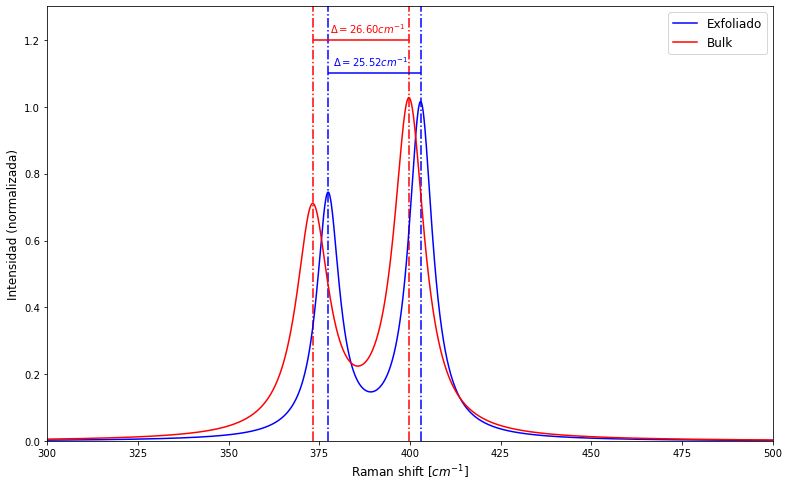

In [47]:
plt.figure(figsize=(13,8))
plt.plot(x_test,doble_lorentz(x_test,A1_nano,gamma1_nano,mu1_nano,A2_nano,gamma2_nano,mu2_nano),label='Exfoliado',c='b')
plt.plot(x_test,doble_lorentz(x_test,A1_bulk,gamma1_bulk,mu1_bulk,A2_bulk,gamma2_bulk,mu2_bulk),label='Bulk',c='r')
plt.vlines([mu1_nano,mu2_nano,mu1_bulk,mu2_bulk],0,1.3,colors=['b','b','r','r'],linestyles='-.')
plt.hlines([1.1,1.2],[mu2_nano,mu2_bulk],[mu1_nano,mu1_bulk],colors=['b','r'])
plt.text(np.mean([mu1_bulk,mu2_bulk])-8.5,1.2+0.02,'$\Delta = $'+'{:.2f}'.format(mu1_bulk-mu2_bulk)+'$cm^{-1}$',color='r' )
plt.text(np.mean([mu1_nano,mu2_nano])-11.5,1.1+0.02,'$\Delta = $'+'{:.2f}'.format(mu1_nano-mu2_nano)+'$cm^{-1}$',color='b' )

plt.ylim(0,1.3)
plt.xlim(300,500)
# plt.title('Acercamiento = {:.2f} $\pm$ {:.2f} cm-1 \n Shift promedio = {:.2f} $\pm$ {:.2f} cm-1'.format(acercamiento,sigma_acercamiento,shift_prom,sigma_shift) )
plt.xlabel('Raman shift [$cm^{-1}$]',fontsize=12)
plt.ylabel('Intensidad (normalizada)',fontsize=12)
plt.legend(fontsize=12)

print(mu1_nano-mu1_bulk,mu2_nano-mu2_bulk)

(300.0, 500.0)

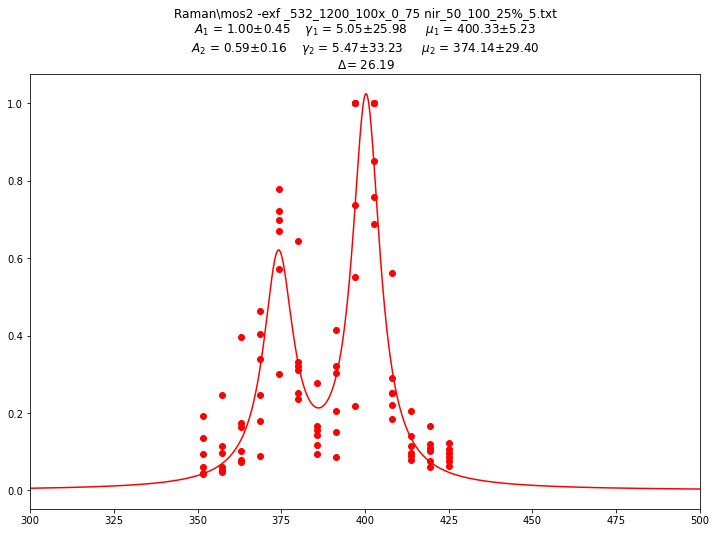

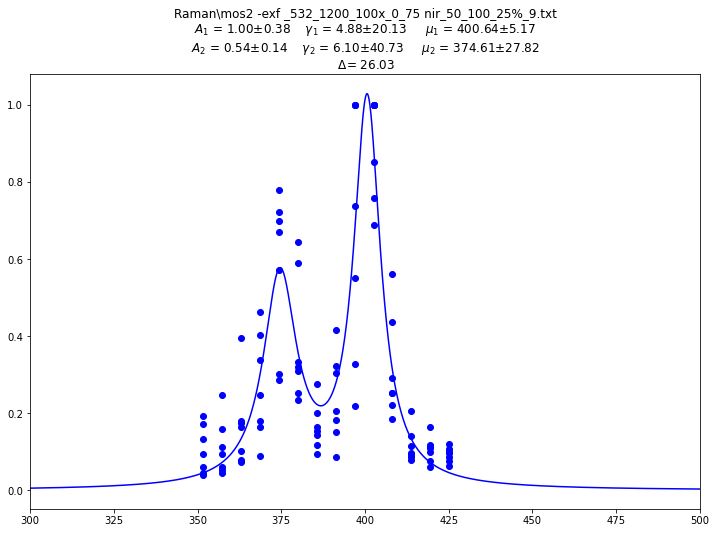

In [9]:
x0 = np.array([])
y0 = np.array([])

for i in range(6):
    color = 'r' if i<6 else 'b'
    t1 = 'Grafica '+str(i+1)
    datos = pd.read_table(filenames[i],sep='\t',header=None)
    y = normalize(datos[1])
    x = datos[0]

    condicion = (x > rango[0]) & (x<rango[1])
    X = x[condicion]
    Y = y[condicion]
    
    x0 = np.hstack((x0,X))
    y0 = np.hstack((y0,Y))

popt,pcov = curve_fit(doble_lorentz,x0,y0,bounds=([0,0,rango[0],0,0,rango[0]], [1., 30., rango[1],1., 30., rango[1]]),absolute_sigma=True )
#     print(popt)

#     print('Coeficientes: ',beta_hats)
#     print('Incertidumbre 63%: ', sigma0)

x_test = np.linspace(300,500,2000)
params1 = '$A_1$ = {:.2f}$\pm${:.2f} \t $\gamma_1$ = {:.2f}$\pm${:.2f} \t $\mu_1$ = {:.2f}$\pm${:.2f}'.format(popt[0],pcov[0,0],popt[1],pcov[1,1],popt[2],pcov[2,2])
params2 = '$A_2$ = {:.2f}$\pm${:.2f} \t $\gamma_2$ = {:.2f}$\pm${:.2f} \t $\mu_2$ = {:.2f}$\pm${:.2f}'.format(popt[3],pcov[3,3],popt[4],pcov[4,4],popt[5],pcov[5,5])


plt.figure(figsize=(12,8))
plt.plot(x_test,doble_lorentz(x_test,*popt),color=color)
plt.title(filenames[i]+'\n'+params1 +'\n' + params2 + '\n $\Delta$= {:.2f}'.format(np.abs(popt[2]-popt[5])) )
plt.scatter(x0,y0,color=color)
plt.xlim(300,500)



    
x1 = np.array([])
y1 = np.array([])

for i in range(6,len(filenames)):
    color = 'r' if i<6 else 'b'
    t1 = 'Grafica '+str(i+1)
    datos = pd.read_table(filenames[i],sep='\t',header=None)
    y = normalize(datos[1])
    x = datos[0]

    condicion = (x > rango[0]) & (x<rango[1])
    X = x[condicion]
    Y = y[condicion]
    
    x1 = np.hstack((x0,X))
    y1 = np.hstack((y0,Y))

popt,pcov = curve_fit(doble_lorentz,x1,y1,bounds=([0,0,rango[0],0,0,rango[0]], [1., 30., rango[1],1., 30., rango[1]]),absolute_sigma=True )
#     print(popt)

#     print('Coeficientes: ',beta_hats)
#     print('Incertidumbre 63%: ', sigma0)

x_test = np.linspace(300,500,2000)
params1 = '$A_1$ = {:.2f}$\pm${:.2f} \t $\gamma_1$ = {:.2f}$\pm${:.2f} \t $\mu_1$ = {:.2f}$\pm${:.2f}'.format(popt[0],pcov[0,0],popt[1],pcov[1,1],popt[2],pcov[2,2])
params2 = '$A_2$ = {:.2f}$\pm${:.2f} \t $\gamma_2$ = {:.2f}$\pm${:.2f} \t $\mu_2$ = {:.2f}$\pm${:.2f}'.format(popt[3],pcov[3,3],popt[4],pcov[4,4],popt[5],pcov[5,5])


plt.figure(figsize=(12,8))
plt.plot(x_test,doble_lorentz(x_test,*popt),color=color)
plt.title(filenames[i]+'\n'+params1 +'\n' + params2 + '\n $\Delta$= {:.2f}'.format(np.abs(popt[2]-popt[5])) )
plt.scatter(x1,y1,color=color)
plt.xlim(300,500)

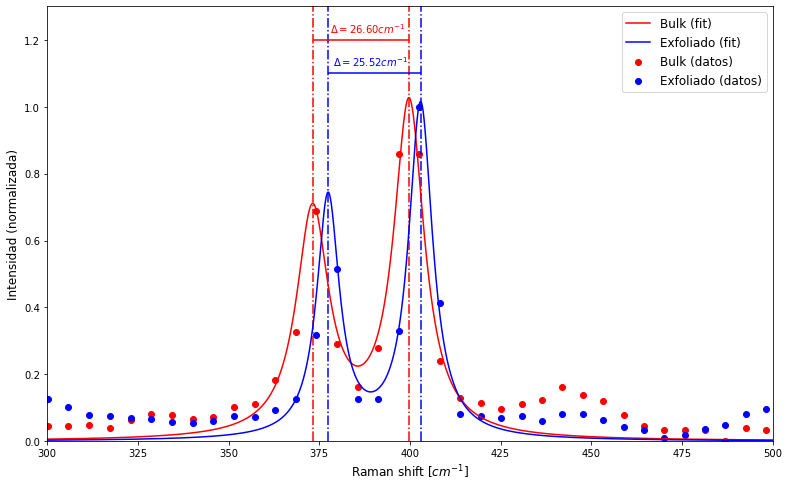

In [85]:
y_bulk = []
x = []
for i in range(5):
    datos = pd.read_table(filenames[i],sep='\t',header=None)
    y_bulk.append(normalize(datos[1]))
    x = datos[0]
y_nano = []
for i in range(5,len(filenames)):
    datos = pd.read_table(filenames[i],sep='\t',header=None)
    y_nano.append(normalize(datos[1]))
    x = datos[0]
    
y_bulk = np.array(y_bulk)
y_bulk = np.mean(y_bulk,axis=0)

y_nano = np.array(y_nano)
y_nano = np.mean(y_nano,axis=0)

plt.figure(figsize=(13,8))
plt.scatter(x,y_bulk,c='r',label='Bulk (datos)')
plt.scatter(x,y_nano,c='b',label='Exfoliado (datos)')

plt.plot(x_test,doble_lorentz(x_test,A1_bulk,gamma1_bulk,mu1_bulk,A2_bulk,gamma2_bulk,mu2_bulk),label='Bulk (fit)',c='r')
plt.plot(x_test,doble_lorentz(x_test,A1_nano,gamma1_nano,mu1_nano,A2_nano,gamma2_nano,mu2_nano),label='Exfoliado (fit)',c='b')
plt.vlines([mu1_nano,mu2_nano,mu1_bulk,mu2_bulk],0,1.3,colors=['b','b','r','r'],linestyles='-.')
plt.hlines([1.1,1.2],[mu2_nano,mu2_bulk],[mu1_nano,mu1_bulk],colors=['b','r'])
plt.text(np.mean([mu1_bulk,mu2_bulk])-8.5,1.2+0.02,'$\Delta = $'+'{:.2f}'.format(mu1_bulk-mu2_bulk)+'$cm^{-1}$',color='r' )
plt.text(np.mean([mu1_nano,mu2_nano])-11.5,1.1+0.02,'$\Delta = $'+'{:.2f}'.format(mu1_nano-mu2_nano)+'$cm^{-1}$',color='b' )

plt.ylim(0,1.3)
plt.xlim(300,500)
# plt.title('Acercamiento = {:.2f} $\pm$ {:.2f} cm-1 \n Shift promedio = {:.2f} $\pm$ {:.2f} cm-1'.format(acercamiento,sigma_acercamiento,shift_prom,sigma_shift) )
plt.xlabel('Raman shift [$cm^{-1}$]',fontsize=12)
plt.ylabel('Intensidad (normalizada)',fontsize=12)
plt.legend(fontsize=12)
plt.savefig('Raman_total.svg',bbox_inches='tight')